In [39]:
import pandas as pd
import numpy as np
import string
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import spacy
!pip install autoscraper
from autoscraper import AutoScraper
!pip install Textblob

In [22]:
link = 'https://www.amazon.in/Theory-Everything-Stephen-Hawking/product-reviews/8179925919/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [24]:
page = requests.get(link)
page

<Response [200]>

In [25]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-p

In [26]:
soup = bs(page.content,'html.parser')

In [27]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>The last pages came out<br/>Binding is not very good but the book itself is good and very informative</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>One of coolest and smallest book on science. It is very interesting to read</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>In detail<br/>Like it</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>New ones interested in space and astronomy. I do suggest you read this as you're first preferred book.<br/>Energy's is mentioned so nearly and in simple terms.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Its good</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>

In [28]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\nThe last pages came outBinding is not very good but the book itself is good and very informative\n',
 '\nOne of coolest and smallest book on science. It is very interesting to read\n',
 '\nIn detailLike it\n',
 "\nNew ones interested in space and astronomy. I do suggest you read this as you're first preferred book.Energy's is mentioned so nearly and in simple terms.\n",
 '\nIts good\n',
 '\nNice book\n',
 '\nI already love science and this book has broadened my knowledge for science. There are too much too learn and this book also said that we all are learning the outdated science in school which I agree because everyday scientist are making new discoveries while we are stuck learning what is being given to us. This book has really changed my outlook.\n',
 '\nI like it thank you amazon\n',
 "\nThis book covers all the fundamentals. Such a nice book I've ever read.\n",
 "\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0I liked it as it's writ

In [29]:
review_content[:] = [reviews.strip() for reviews in review_content]
review_content

['The last pages came outBinding is not very good but the book itself is good and very informative',
 'One of coolest and smallest book on science. It is very interesting to read',
 'In detailLike it',
 "New ones interested in space and astronomy. I do suggest you read this as you're first preferred book.Energy's is mentioned so nearly and in simple terms.",
 'Its good',
 'Nice book',
 'I already love science and this book has broadened my knowledge for science. There are too much too learn and this book also said that we all are learning the outdated science in school which I agree because everyday scientist are making new discoveries while we are stuck learning what is being given to us. This book has really changed my outlook.',
 'I like it thank you amazon',
 "This book covers all the fundamentals. Such a nice book I've ever read.",
 "The media could not be loaded.\n                \n\n\n\n\xa0I liked it as it's written by my inspiration sir Hawking. So I'm yet to read but the book

In [30]:
df = pd.DataFrame()
df['Text']=review_content
df

,Text
0,The last pages came outBinding is not very goo...
1,One of coolest and smallest book on science. I...
2,In detailLike it
3,New ones interested in space and astronomy. I ...
4,Its good
5,Nice book
6,I already love science and this book has broad...
7,I like it thank you amazon
8,This book covers all the fundamentals. Such a ...
9,The media could not be loaded.\n ...


In [31]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] 
freq

book           9
and            6
I              5
is             5
very           4
are            4
the            4
to             4
good           3
this           3
in             3
my             3
it             3
read           3
science        2
you            2
interesting    2
as             2
has            2
read.          2
dtype: int64

In [32]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [33]:
df['Text']

0    The last pages came outBinding good book good ...
1    One coolest smallest book science. It interest...
2                                        In detailLike
3    New ones interested space astronomy. I suggest...
4                                             Its good
5                                            Nice book
6    I already love science book broadened knowledg...
7                                  I like thank amazon
8    This book covers fundamentals. Such nice book ...
9    The media could loaded. I liked written inspir...
Name: Text, dtype: object

In [35]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] 
freq

book           9
I              5
good           3
read           3
science.       2
learning       2
science        2
This           2
like           2
read.          2
interesting    2
The            2
written        1
So             1
looks          1
everyday       1
scientist      1
making         1
new            1
discoveries    1
dtype: int64

In [36]:
freq1 = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq1

book           9
I              5
good           3
read           3
science.       2
learning       2
science        2
This           2
like           2
read.          2
interesting    2
The            2
written        1
So             1
looks          1
everyday       1
scientist      1
making         1
new            1
discoveries    1
dtype: int64

In [41]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [42]:
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df

,Text,subjectivity,polarity
0,The last pages came outBinding good book good ...,0.422222,0.466667
1,One coolest smallest book science. It interest...,0.500000,0.500000
2,In detailLike,0.000000,0.000000
3,New ones interested space astronomy. I suggest...,0.411255,0.159091
4,Its good,0.600000,0.700000
5,Nice book,1.000000,0.600000
6,I already love science book broadened knowledg...,0.447980,0.072727
7,I like thank amazon,0.000000,0.000000
8,This book covers fundamentals. Such nice book ...,0.750000,0.300000
9,The media could loaded. I liked written inspir...,0.650000,0.550000


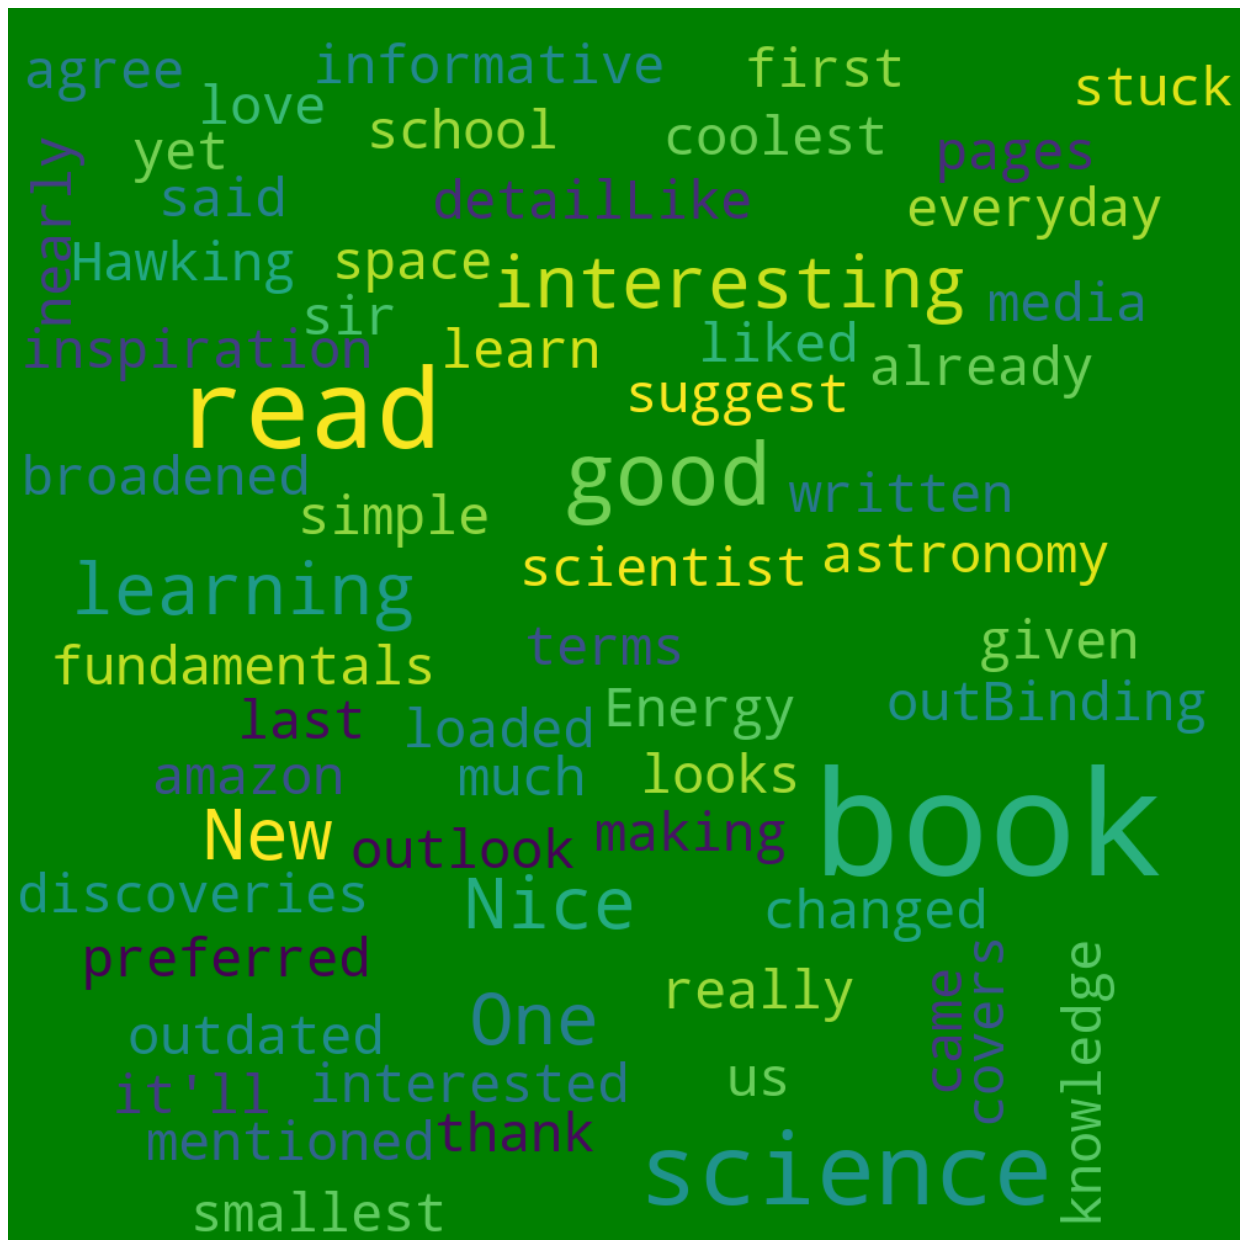

In [47]:
allwords = " ".join([twts for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119,background_color='green').generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [48]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [49]:
df["analysis"] = df["polarity"].apply(analysis)
df

,Text,subjectivity,polarity,analysis
0,The last pages came outBinding good book good ...,0.422222,0.466667,Positive
1,One coolest smallest book science. It interest...,0.500000,0.500000,Positive
2,In detailLike,0.000000,0.000000,Neutral
3,New ones interested space astronomy. I suggest...,0.411255,0.159091,Positive
4,Its good,0.600000,0.700000,Positive
5,Nice book,1.000000,0.600000,Positive
6,I already love science book broadened knowledg...,0.447980,0.072727,Positive
7,I like thank amazon,0.000000,0.000000,Neutral
8,This book covers fundamentals. Such nice book ...,0.750000,0.300000,Positive
9,The media could loaded. I liked written inspir...,0.650000,0.550000,Positive


In [50]:
positive_reviews = df[df['analysis'] == 'Positive']
negative_reviews = df[df['analysis'] == 'Negative']

print('positive Reviews')
for i, row in positive_reviews[:5].iterrows():
  print(' -' + row['Text'])

print('negative Reviews')
for i, row in negative_reviews[:5].iterrows():
  print(' -' + row['Text'])

positive Reviews
 -The last pages came outBinding good book good informative
 -One coolest smallest book science. It interesting read
 -New ones interested space astronomy. I suggest read first preferred book.Energy's mentioned nearly simple terms.
 -Its good
 -Nice book
negative Reviews


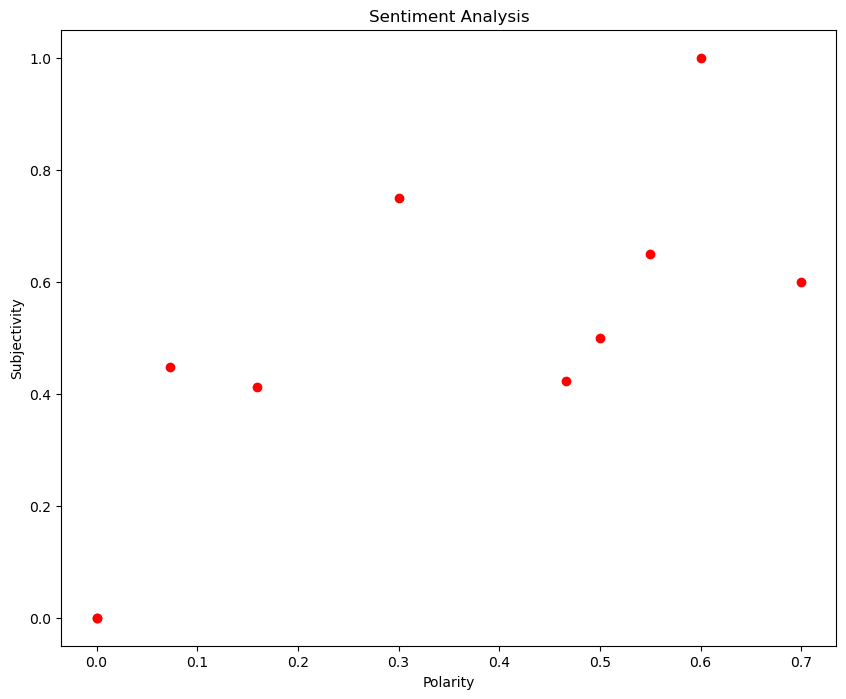

In [51]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity") 
plt.ylabel("Subjectivity") 
plt.show() 

In [52]:
# The book has got positive reviews 